In [1]:
import optuna
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from kennard_stone import KFold
import pandas as pd
from yikit.models import Objective
from yikit.tools import get_learning_curve

In [2]:
SEED = 334

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target, name = 'PRICE')

In [4]:
rf = RandomForestRegressor(n_jobs = -1, random_state = SEED)

In [5]:
objective = Objective(rf, X, y, scoring = 'neg_root_mean_squared_error', n_jobs = -1, random_state = SEED, cv = KFold(n_splits=5))

In [6]:
study = optuna.create_study(direction = 'maximize', sampler = objective.sampler)
study.optimize(objective, n_trials = 100)

[I 2021-08-06 17:13:21,580] A new study created in memory with name: no-name-c2bed80a-08db-4b72-856f-61ebfcaf7ccb
[I 2021-08-06 17:13:27,018] Trial 0 finished with value: -3.180652746549155 and parameters: {'min_samples_split': 7, 'max_depth': 22, 'n_estimators': 193}. Best is trial 0 with value: -3.180652746549155.
[I 2021-08-06 17:13:29,556] Trial 1 finished with value: -3.335520174646219 and parameters: {'min_samples_split': 7, 'max_depth': 88, 'n_estimators': 12}. Best is trial 0 with value: -3.180652746549155.
[I 2021-08-06 17:13:32,524] Trial 2 finished with value: -3.232502392765172 and parameters: {'min_samples_split': 16, 'max_depth': 70, 'n_estimators': 260}. Best is trial 0 with value: -3.180652746549155.
[I 2021-08-06 17:13:35,034] Trial 3 finished with value: -3.126348444255087 and parameters: {'min_samples_split': 5, 'max_depth': 92, 'n_estimators': 363}. Best is trial 3 with value: -3.126348444255087.
[I 2021-08-06 17:13:36,633] Trial 4 finished with value: -3.2464973457

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Trials', ylabel='Objective Values'>)

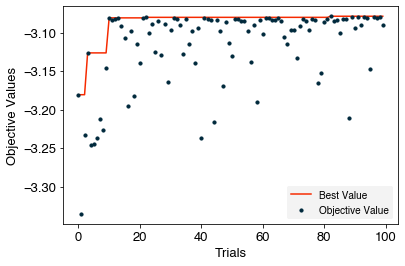

In [7]:
get_learning_curve(study)

In [8]:
rf_opt = clone(rf).set_params(**study.best_params)

In [9]:
kf = KFold(cv = 5)
for i_train, i_test in kf.split(X, y):
    rf_opt = clone(rf_opt)
    X_train, y_train = X.loc[i_train], y[i_train]
    X_test, y_test = X.loc[i_test], y[i_test]

    rf_opt.fit(X_train, y_train)
    print(mean_squared_error(y_test, rf_opt.predict(X_test), squared = False))

2.181961118929675
2.334427374240162
2.7523462760036557
3.260654885795385
4.865314186005324
